In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def Profile_analysis (myGender = 'total', myAge = '6 years and over' , myEducation = 'total'): # If the variable is not specified
                                                                                       # the total value is defined as 
                                                                                       # default value
    ## IMPORT AND CLEAN THE DATASET
            
    RawData = pd.read_csv('Books - sex, age and educational level.csv')
    Data = RawData.dropna(1)
            
    ## VARIABLES DEFINITION
            
    Type1 = RawData['Data type'] == 'at least one book'  # tot of reading ppl
    Type2 = RawData['Data type'] == 'from 1 to 3 books'  # ppl reading 1 to 3 books -> Weak Readers
    Type3 = RawData['Data type'] == '12  books and over' # ppl reading 12 or more books -> Strong Readers

    ## PROFILE DEFINITION

    Gender = RawData['Gender'] == myGender
    Age = RawData['Age class'] == myAge
    Education = RawData['Educational level'] == myEducation

    
    Readers = Data[Type1 & Gender & Age & Education].Value
    Weak_readers = Data[Type2 & Gender & Age & Education].Value
    Strong_readers = Data[Type3 & Gender & Age & Education].Value
    
    ## TIME RANGE

    Years = np.arange(2009,2020,1)
    
    ## DATAFRAME DEFINITION
    Readers_df = pd.DataFrame(list(zip(Readers, Weak_readers, Strong_readers)), 
               columns =["Readers", "Weak Readers", "Strong Readers"],
               index = Years) 
    # Percentage of non readers
    Readers_df['100']= 100
    Readers_df['Non Readers']= Readers_df['100'] -Readers_df['Readers']
    Readers_df = Readers_df.drop(['100'],axis=1)

    ## PLOT
    
    fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = (20,12))

    # Plot settings
    for a in [0,1]:
        ax[a].tick_params(axis="x", labelsize=20);
        ax[a].tick_params(axis="y", labelsize=15);
        ax[a].set_ylim([0,100]);
        ax[a].set_facecolor('oldlace');
        ax[a].grid(axis = 'both',lw = 2,c='w');
        ax[a].set_xticks(np.arange(2009, 2020, step = 1));

    # Plots values and legends definition
    ax[0].plot(Readers_df.index,Readers_df['Readers'],marker='o',ms=8, lw =2, c='orange', label = 'Percentage of readers')
    ax[0].legend(fontsize = 15, edgecolor = 'w');


    ax[1].bar(Readers_df.index , Readers_df['Weak Readers'], width = 0.4, align='edge', 
                     alpha = 0.4, label= 'Weak Readers')
    ax[1].bar(Readers_df.index , Readers_df['Strong Readers'], width = -0.4, align='edge', 
                     alpha = 0.4, label= 'Strong Readers', color= 'r')
    ax[1].legend(fontsize = 15, edgecolor = 'w');

    # Values display
    for i,j in zip(Readers_df.index,Readers_df['Readers']):
        ax[0].annotate((str(j)+'%'),xy=(i-0.1,j+5), fontsize = 15)
    
    for i,k in zip(Readers_df.index,Readers_df['Weak Readers']):
        ax[1].annotate((str(k)+'%'),xy=(i,k+3), fontsize = 13)
    
    for i,z in zip(Readers_df.index,Readers_df['Strong Readers']):
        ax[1].annotate((str(z)+'%'),xy=(i-0.45,z+3), fontsize = 13)
    
    # Add a desctiptive text to the graphs
    ax[0].text(2014,110, 'PROFILE: ' + myGender + ', ' + myAge + ', ' + myEducation + '.',horizontalalignment='center',
             verticalalignment='center', fontsize = 20)
        
    ## DISPLAY THE TABULAT DATA    
    
    print(Readers_df)

    ## EXPORT THE GRAPHS AS IMAGE
    plt.savefig( 'Function01.png')

      Readers  Weak Readers  Strong Readers  Non Readers
2009     85.6          27.6            21.4         14.4
2010     84.5          31.0            21.0         15.5
2011     84.7          31.0            20.2         15.3
2012     83.3          32.9            20.8         16.7
2013     79.8          36.1            15.2         20.2
2014     79.6          34.9            17.0         20.4
2015     75.5          35.9            17.1         24.5
2016     76.0          35.0            16.5         24.0
2017     71.7          38.7            13.7         28.3
2018     76.9          39.0            16.6         23.1
2019     72.0          36.9            20.6         28.0


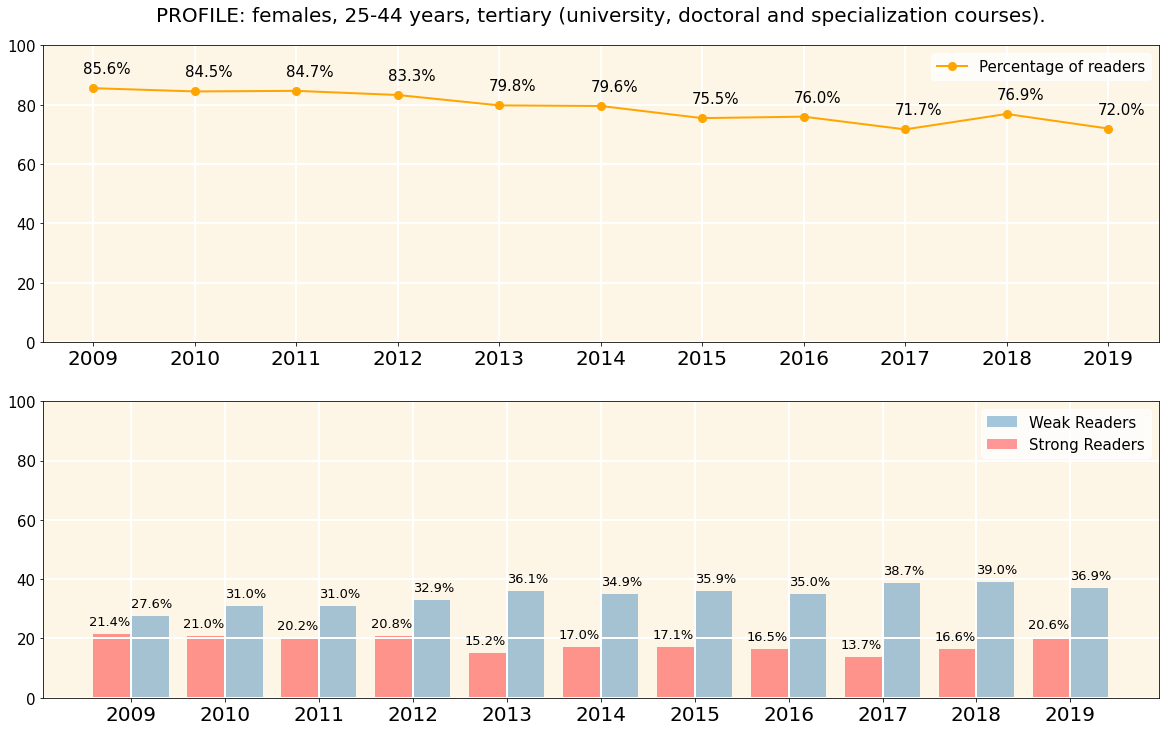

In [3]:
Profile_analysis('females','25-44 years','tertiary (university, doctoral and specialization courses)')